# Problem caused by Imbalanced Dataset.

Imbalanced dataset can be defined as dataset with huge difference between the the no of instances for two or more class.Now let us look at the problem created by using imbalanced dataset for creating machine learning model.

In [2]:
import pandas as pd

df_train = pd.read_csv("~/Downloads/porto-seguro-safe-driver-prediction/train.csv")
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
This is porto-seguro-safe-driver-prediction dataset, which is hugely imbalnced as data for bad driver is less as 
compared to good driver. Now lets use the same to create a machine learning model which could predict whether 
the given driver is good or bad.

In [3]:
noOfValue = df_train.target.value_counts()
ratio = round(noOfValue[0]/noOfValue[1],2)
print('1=', noOfValue[0])
print('0=', noOfValue[1])
print('ratio = ', ratio, ':1')

('1=', 573518)
('0=', 21694)
('ratio = ', 26.0, ':1')


We can clearly visualize the huge gap between the instances for two classes (0=good driver and 1=bad driver)

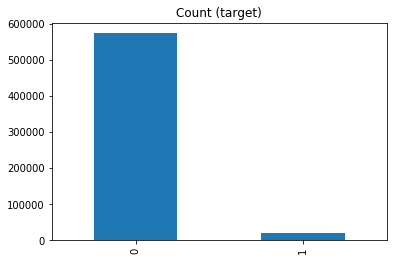

In [5]:
noOfValue.plot(kind='bar', title='Count (target)')

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Remove 'id' and 'target' columns
labels = df_train.columns[2:]

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:"+str(int(accuracy * 100))+"%")


Accuracy:96%


In [ ]:
As we can see we are getting a accuracy of 96% which can be considered very good and we may deploy the same into
company model but soon we will notice something unusual which is, that we are predicting each and every one as a
good driver and all bad driver too are classified as good driver(false positive).Which is very huge flaw even 
though the acuuracy score were quite good.

As accuracy score are quite deceiving therefore data scientist also use recal and precision to classify
a model into a good or bad one.

Precision:
    can be defined as total no of predicted true positive divided by sum of total no of actual positive and 
    total no of false positives.High precision indicate that the instances which are classified as positive are
    indeed positive.
    
    Precision = TP(predicted)/TP(actual)+FP

Recall:
    can be defined as total no of predicted true positive divided by sum of total no of actual positive and total
    no of false negative.High recall indicate that the class is correctly classified.
    
    Recall = TP(predicted)/TP(actual)+FN
    
High recall, low precision:
    This means that most of the positive examples are correctly recognized (low FN) but
    there are a lot of false positives.

Low recall, high precision:
    This shows that we miss a lot of positive examples (high FN) but those we predict as
    positive are indeed positive (low FP)
    
F-measure:
    as their are two values to measure the goodness,hence it will be quite helpfull if we could combine the both
    into one,thus F-measure is used.It takes harmonic mean of both instead of arithmatic mean that is punishing
    the extream value more,therefore fmeasure generally will be nearer to lower value of precisionand recall.
    
    F-measure = (2*recall*precision)/(recall+precision)



In [8]:
print classification_report(y_test, y_pred) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114709
           1       0.00      0.00      0.00      4334

   micro avg       0.96      0.96      0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/home/likun54/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
high recall and low precision suggest that our model is classifiying all good driver as good driver but their 
are also a high no of false positive that is bad driver being cllasified as good driver.

We can clearly infer from precision and recall value for bad driver(1) class that how badly our model has failed 
in predicting bad driver(1).

Another common method used to check credibility of model is confusion matrix.


Confusion matrix:
[[114709      0]
 [  4334      0]]


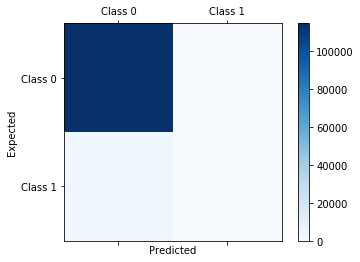

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 

result = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(result)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
Even our confusion matrix is showing same result that out of 4334 bad driver(1) class we have classified all of
them as good driver(false positive).